<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/Corr_W9_ML%26_Classification_challenge_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [ ]:
df_main['DATE'] = pd.to_datetime(df_main['DATE'])

In [ ]:
df_main.info() # No missing values

In [ ]:
df_opinion['date'] = pd.to_datetime(df_opinion['date'])

In [ ]:
df_opinion.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  341 non-null    object 
 1   WEATHER_CODE_EVENING  341 non-null    int64  
 2   TOTAL_SNOW_MM         341 non-null    int64  
 3   UV_INDEX              341 non-null    int64  
 4   SUNHOUR               341 non-null    float64
 5   OPINION               341 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 16.1+ KB


# Classification challenge

Your goal are :
- to merge both 2018 DataFrames
- to train-test split the new 2018 DataFrame
- to train 3 differents Machine Learning algorithms (KNN, logistic regression and decision tree) with "opinion" as target
- to try different parameters
- to find the best accuracy score (on the test set of course)
- to fill the missing values in the "opinion" columns whith your best model
- to explain what is the "rules" used by your model to predict the opinion.

You can help yourself with charts if you want.

In [ ]:
# Your code here :
# Merge both df

df_2018 = pd.merge(df_main, df_opinion, how='left', left_on='DATE', right_on='date')

In [ ]:
df_2018.info() # There are missing values and date twice

In [ ]:
# Remove date column
del df_2018['date']

In [ ]:
df_2018.info()

## 2. Séparation des données

In [ ]:
# Select only rows without Nan
df_2018_clean = df_2018[df_2018['OPINION'].notna()]

In [ ]:
df_2018_clean.info()

## 2.1. Work all non na values

In [ ]:
# Select only where in original df there's no Nan
df_2018_num = df_2018_clean[df_2018_clean.select_dtypes("number").columns]

In [ ]:
# Choix des variables X et y

X = df_2018_num.iloc[:,:-4]
y = df_2018_clean['OPINION']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 341
The length of the train dataset is   : 255
The length of the test dataset is    : 86


## 2.2. Création des models KNN / LR / DTC

In [ ]:
# Intialisation du model KNN
modelKNN = KNeighborsClassifier()

In [ ]:
# Intialisation du model LogisticReg
modelLR = LogisticRegression(max_iter=4600)

In [ ]:
# Intialisation du model Tree
modelDTC = DecisionTreeClassifier()

## Test à la main du model LR

In [ ]:
modelLR.fit(X_train, y_train)

LogisticRegression(max_iter=4600)

In [ ]:
# Vérification des classes
modelLR.classes_

array(['bad', 'good', 'not good not bad', 'very bad', 'very good'],
      dtype=object)

In [ ]:
y_train_pred = modelLR.predict(X_train)
y_test_pred = modelLR.predict(X_test)

In [ ]:
print("score de précision (accuracy) sur l'ensemble d'entraînement :",modelLR.score(X_train, y_train))
print("score de précision (accuracy) sur l'ensemble de test :",modelLR.score(X_test, y_test))

score de précision (accuracy) sur l'ensemble d'entraînement : 0.8941176470588236
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046


In [ ]:
modelLR.n_iter_

array([3740], dtype=int32)

## 2.3. Normalised values

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2.4. Automatisation Score

In [ ]:
def auto_score(model, x_train, x_test):
    X_train = x_train
    X_test = x_test
    # Training
    model.fit(X_train, y_train)

    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Score
    print("score de précision (accuracy) sur l'ensemble d'entraînement :",model.score(X_train, y_train))
    print("score de précision (accuracy) sur l'ensemble de test :",model.score(X_test, y_test),"\n")

    print("Labels \t['bad', 'good', 'not good not bad', 'very bad', 'very good']")
    print("f1 score :", f1_score(y_true=y_train, y_pred=y_train_pred,
                                 labels=['bad', 'good', 'not good not bad', 'very bad', 'very good'],
                                 average=None), "\n")
    print("Labels    \t['bad', 'good', 'not good not bad', 'very bad', 'very good']")
    print("precision score :", precision_score(y_true=y_train, y_pred=y_train_pred,
                                               labels=['bad', 'good', 'not good not bad', 'very bad', 'very good'],
                                               average=None), "\n")
    print("Labels    \t['bad', 'good', 'not good not bad', 'very bad', 'very good']")
    print("recall score :", recall_score(y_true=y_train, y_pred=y_train_pred,
                                            labels=['bad', 'good', 'not good not bad', 'very bad', 'very good'],
                                            average=None), "\n")
    conf_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    conf_train = pd.DataFrame(conf_train,
                            index=modelLR.classes_ + ": reel",
                            columns=modelLR.classes_ + ": pred")
    print("Confusion matrix train: \n", conf_train)
    conf_test = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    conf_test = pd.DataFrame(conf_test,
                            index=model.classes_ + ": reel",
                            columns=model.classes_ + ": pred")
    print("Confusion matrix test: \n", conf_test)
    return model.score(X_test, y_test)

In [ ]:
auto_score(modelKNN, X_train, X_test)

score de précision (accuracy) sur l'ensemble d'entraînement : 0.8
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.86567164 0.81081081 0.67391304 0.8490566  0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.80555556 0.76923077 0.72093023 0.9375     0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.85714286 0.63265306 0.77586207 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               3                0
good: reel                      0          60  ...               0                3
not good not bad: reel          5          12  ...               0                1
very bad: reel                  9           0  ...            

0.7790697674418605

In [ ]:
auto_score(modelKNN, X_train_scaled, X_test_scaled)

score de précision (accuracy) sur l'ensemble d'entraînement : 0.8117647058823529
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.875      0.8        0.64197531 0.91891892 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.84848485 0.71111111 0.8125     0.96226415 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.91428571 0.53061224 0.87931034 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           1  ...               2                0
good: reel                      0          64  ...               0                4
not good not bad: reel          4          19  ...               0                0
very bad: reel                  6           0  

0.7674418604651163

In [ ]:
auto_score(modelLR, X_train, X_test)

score de précision (accuracy) sur l'ensemble d'entraînement : 0.8941176470588236
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.93442623 0.87323944 0.80808081 0.97435897 0.8       ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.95       0.86111111 0.8        0.96610169 0.85714286] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.88571429 0.81632653 0.98275862 0.75      ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               2                0
good: reel                      0          62  ...               0                1
not good not bad: reel          2           6  ...               0                1
very bad: reel                  1           0  

0.7906976744186046

In [ ]:
auto_score(modelLR, X_train_scaled, X_test_scaled)

score de précision (accuracy) sur l'ensemble d'entraînement : 0.8470588235294118
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.88888889 0.84931507 0.73333333 0.94117647 0.62068966] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.875      0.81578947 0.80487805 0.91803279 0.69230769] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.88571429 0.67346939 0.96551724 0.5625    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               3                0
good: reel                      0          62  ...               0                3
not good not bad: reel          6           7  ...               2                1
very bad: reel                  2           0  

0.7906976744186046

In [ ]:
auto_score(modelDTC, X_train, X_test)

score de précision (accuracy) sur l'ensemble d'entraînement : 1.0
score de précision (accuracy) sur l'ensemble de test : 0.9186046511627907 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [1. 1. 1. 1. 1.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [1. 1. 1. 1. 1.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [1. 1. 1. 1. 1.] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      62           0  ...               0                0
good: reel                      0          70  ...               0                0
not good not bad: reel          0           0  ...               0                0
very bad: reel                  0           0  ...              58                0
very good: reel                 0           0  ...               0               16

[5 rows x 5 c

0.9186046511627907

### Overfitting

In [ ]:
auto_score(modelDTC, X_train_scaled, X_test_scaled)

score de précision (accuracy) sur l'ensemble d'entraînement : 1.0
score de précision (accuracy) sur l'ensemble de test : 0.9186046511627907 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [1. 1. 1. 1. 1.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [1. 1. 1. 1. 1.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [1. 1. 1. 1. 1.] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      62           0  ...               0                0
good: reel                      0          70  ...               0                0
not good not bad: reel          0           0  ...               0                0
very bad: reel                  0           0  ...              58                0
very good: reel                 0           0  ...               0               16

[5 rows x 5 c

0.9186046511627907

In [ ]:
auto_score(DecisionTreeClassifier(max_depth=4), X_train, X_test)

score de précision (accuracy) sur l'ensemble d'entraînement : 0.8588235294117647
score de précision (accuracy) sur l'ensemble de test : 0.8372093023255814 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [1.         0.81481481 0.72727273 1.         0.55172414] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [1.         0.84615385 1.         1.         0.38095238] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [1.         0.78571429 0.57142857 1.         1.        ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      62           0  ...               0                0
good: reel                      0          55  ...               0               15
not good not bad: reel          0          10  ...               0               11
very bad: reel                  0           0  

0.8372093023255814

In [ ]:
# loop to find the best number of neighbors
accuracyKnn = []
k_range = range(1,11)
for i in k_range:
    print(f"For {i} neighbors")
    accuracyKnn.append(auto_score(KNeighborsClassifier(n_neighbors=i), X_train, X_test))

For 1 neighbors
score de précision (accuracy) sur l'ensemble d'entraînement : 1.0
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [1. 1. 1. 1. 1.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [1. 1. 1. 1. 1.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [1. 1. 1. 1. 1.] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      62           0  ...               0                0
good: reel                      0          70  ...               0                0
not good not bad: reel          0           0  ...               0                0
very bad: reel                  0           0  ...              58                0
very good: reel                 0           0  ...               0               1

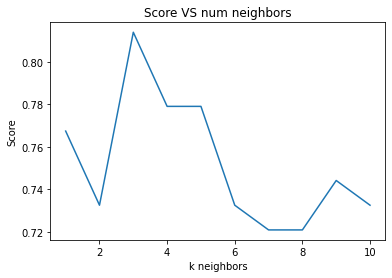

In [ ]:
sns.lineplot(x=k_range,
             y=accuracyKnn).set_title("Score VS num neighbors")
plt.ylabel("Score")
plt.xlabel("k neighbors")
plt.show()

## With 3 neighbors we got the best score but only 0.81395

In [ ]:
accuracyLR = []
iter_range = range(10 , 1000, 10)
for i in iter_range:
    print(f"For {i} deph")
    accuracyLR.append(auto_score(LogisticRegression(max_iter=i), X_train, X_test))

For 10 deph
score de précision (accuracy) sur l'ensemble d'entraînement : 0.6392156862745098
score de précision (accuracy) sur l'ensemble de test : 0.5930232558139535 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.80851064 0.69512195 0.5862069  0.4109589  0.        ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.72151899 0.60638298 0.50746269 1.         0.        ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.81428571 0.69387755 0.25862069 0.        ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               0                0
good: reel                      0          57  ...               0                0
not good not bad: reel          3          12  ...               0                0
very bad: reel                 19  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

score de précision (accuracy) sur l'ensemble d'entraînement : 0.788235294117647
score de précision (accuracy) sur l'ensemble de test : 0.7209302325581395 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.84126984 0.79470199 0.72527473 0.85       0.36363636] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.828125   0.74074074 0.78571429 0.82258065 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.85483871 0.85714286 0.67346939 0.87931034 0.25      ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      53           0  ...               9                0
good: reel                      0          60  ...               0                2
not good not bad: reel          5           9  ...               2                0
very bad: reel                  6           0  .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.796078431372549
score de précision (accuracy) sur l'ensemble de test : 0.7441860465116279 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.81967213 0.82758621 0.66666667 0.87179487 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.83333333 0.8        0.68085106 0.86440678 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.80645161 0.85714286 0.65306122 0.87931034 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      50           0  ...               7                0
good: reel                      0          60  ...               0                4
not good not bad: reel          7           9  ...               1                0
very bad: reel                  3           0  .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


                        bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      13           0  ...               3                0
good: reel                      0          14  ...               0                3
not good not bad: reel          4           3  ...               0                0
very bad: reel                  1           0  ...              23                0
very good: reel                 0           2  ...               0                3

[5 rows x 5 columns]
For 100 deph
score de précision (accuracy) sur l'ensemble d'entraînement : 0.807843137254902
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.82644628 0.82191781 0.69565217 0.89256198 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.84745763 0.78947368 0.74418605 0.85714286 0.71428571] 

Labels    	['bad'

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8117647058823529
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.85245902 0.8137931  0.68131868 0.91666667 0.625     ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.86666667 0.78666667 0.73809524 0.88709677 0.625     ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.83870968 0.84285714 0.63265306 0.94827586 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      52           0  ...               6                0
good: reel                      0          59  ...               0                5
not good not bad: reel          6          10  ...               1                1
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8156862745098039
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.86885246 0.81118881 0.69473684 0.91525424 0.625     ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88333333 0.79452055 0.7173913  0.9        0.625     ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.85483871 0.82857143 0.67346939 0.93103448 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      53           0  ...               5                0
good: reel                      0          58  ...               0                5
not good not bad: reel          5           9  ...               1                1
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8235294117647058
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.87804878 0.8137931  0.71111111 0.91666667 0.625     ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.8852459  0.78666667 0.7804878  0.88709677 0.625     ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.87096774 0.84285714 0.65306122 0.94827586 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      54           0  ...               6                0
good: reel                      0          59  ...               0                5
not good not bad: reel          5          10  ...               1                1
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8352941176470589
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.88709677 0.81690141 0.7311828  0.94117647 0.625     ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88709677 0.80555556 0.77272727 0.91803279 0.625     ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.88709677 0.82857143 0.69387755 0.96551724 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      55           0  ...               4                0
good: reel                      0          58  ...               0                5
not good not bad: reel          5           8  ...               1                1
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8352941176470589
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.88709677 0.8137931  0.7173913  0.94117647 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88709677 0.78666667 0.76744186 0.91803279 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.88709677 0.84285714 0.67346939 0.96551724 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      55           0  ...               4                0
good: reel                      0          59  ...               0                4
not good not bad: reel          5          10  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8470588235294118
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.896      0.82517483 0.73684211 0.95726496 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88888889 0.80821918 0.76086957 0.94915254 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.84285714 0.71428571 0.96551724 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          59  ...               0                4
not good not bad: reel          5           8  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8431372549019608
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.896      0.81690141 0.72916667 0.95726496 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88888889 0.80555556 0.74468085 0.94915254 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.82857143 0.71428571 0.96551724 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          58  ...               0                4
not good not bad: reel          5           8  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8470588235294118
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.88709677 0.83098592 0.72164948 0.95726496 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88709677 0.81944444 0.72916667 0.94915254 0.78571429] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.88709677 0.84285714 0.71428571 0.96551724 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      55           0  ...               2                0
good: reel                      0          59  ...               0                3
not good not bad: reel          5           8  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8549019607843137
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.88709677 0.84931507 0.72340426 0.95726496 0.75862069] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88709677 0.81578947 0.75555556 0.94915254 0.84615385] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.88709677 0.88571429 0.69387755 0.96551724 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      55           0  ...               2                0
good: reel                      0          62  ...               0                2
not good not bad: reel          5           9  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8549019607843137
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.88709677 0.84931507 0.72340426 0.95726496 0.75862069] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88709677 0.81578947 0.75555556 0.94915254 0.84615385] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.88709677 0.88571429 0.69387755 0.96551724 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      55           0  ...               2                0
good: reel                      0          62  ...               0                2
not good not bad: reel          5           9  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8509803921568627
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.88709677 0.83916084 0.72916667 0.94915254 0.75862069] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88709677 0.82191781 0.74468085 0.93333333 0.84615385] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.88709677 0.85714286 0.71428571 0.96551724 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      55           0  ...               3                0
good: reel                      0          60  ...               0                2
not good not bad: reel          5           8  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8549019607843137
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.896      0.84137931 0.7311828  0.94915254 0.75862069] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88888889 0.81333333 0.77272727 0.93333333 0.84615385] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.87142857 0.69387755 0.96551724 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               3                0
good: reel                      0          61  ...               0                2
not good not bad: reel          5           9  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8431372549019608
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.896      0.82432432 0.72527473 0.95726496 0.62068966] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88888889 0.78205128 0.78571429 0.94915254 0.69230769] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.87142857 0.67346939 0.96551724 0.5625    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          61  ...               0                4
not good not bad: reel          5          10  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble de test : 0.8023255813953488 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.87804878 0.82758621 0.7311828  0.94915254 0.64516129] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.8852459  0.8        0.77272727 0.93333333 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.87096774 0.85714286 0.69387755 0.96551724 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      54           0  ...               3                0
good: reel                      0          60  ...               0                5
not good not bad: reel          5           9  ...               1                0
very bad: reel                  2           0  ...              56                0
very good: reel                 0           

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8509803921568627
score de précision (accuracy) sur l'ensemble de test : 0.8023255813953488 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.88709677 0.84353741 0.7311828  0.95726496 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.88709677 0.80519481 0.77272727 0.94915254 0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.88709677 0.88571429 0.69387755 0.96551724 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      55           0  ...               2                0
good: reel                      0          62  ...               0                3
not good not bad: reel          5           9  ...               1                0
very bad: reel                  2           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


 [0.912      0.84563758 0.72527473 0.97435897 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.9047619  0.79746835 0.78571429 0.96610169 0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.9        0.67346939 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          63  ...               0                2
not good not bad: reel          5          10  ...               1                0
very bad: reel                  1           0  ...              57                0
very good: reel                 0           6  ...               0               10

[5 rows x 5 columns]
Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


 [0.90322581 0.84931507 0.73913043 0.96610169 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.90322581 0.81578947 0.79069767 0.95       0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.88571429 0.69387755 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          62  ...               0                3
not good not bad: reel          5           8  ...               1                1
very bad: reel                  1           0  ...              57                0
very good: reel                 0           6  ...               0               10

[5 rows x 5 columns]
Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


 0.8627450980392157
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.912      0.85135135 0.72527473 0.96610169 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.9047619  0.80769231 0.78571429 0.95       0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.9        0.67346939 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          63  ...               0                2
not good not bad: reel          5           9  ...               2                0
very bad: reel                  1           0  ...              57                0
very good: reel         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8549019607843137
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.84563758 0.7173913  0.96610169 0.64285714] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.79746835 0.76744186 0.95       0.75      ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.9        0.67346939 0.98275862 0.5625    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               1                0
good: reel                      0          63  ...               0                2
not good not bad: reel          4           9  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8549019607843137
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.84563758 0.7173913  0.96610169 0.64285714] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.79746835 0.76744186 0.95       0.75      ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.9        0.67346939 0.98275862 0.5625    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               1                0
good: reel                      0          63  ...               0                2
not good not bad: reel          4           9  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8588235294117647
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.84563758 0.7311828  0.97435897 0.64285714] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.79746835 0.77272727 0.96610169 0.75      ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.9        0.69387755 0.98275862 0.5625    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               1                0
good: reel                      0          63  ...               0                2
not good not bad: reel          4           9  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8588235294117647
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.84353741 0.7311828  0.97435897 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.80519481 0.77272727 0.96610169 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.88571429 0.69387755 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               1                0
good: reel                      0          62  ...               0                3
not good not bad: reel          4           9  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8588235294117647
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.84137931 0.74468085 0.96610169 0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.81333333 0.77777778 0.95       0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.87142857 0.71428571 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          61  ...               0                3
not good not bad: reel          4           8  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8705882352941177
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.8630137  0.76595745 0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.82894737 0.8        0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.9        0.73469388 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          63  ...               0                2
not good not bad: reel          4           7  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8705882352941177
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.8630137  0.76595745 0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.82894737 0.8        0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.9        0.73469388 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          63  ...               0                2
not good not bad: reel          4           7  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8705882352941177
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.8630137  0.76595745 0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.82894737 0.8        0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.9        0.73469388 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          63  ...               0                2
not good not bad: reel          4           7  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8666666666666667
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.85714286 0.75268817 0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.81818182 0.79545455 0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.9        0.71428571 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          63  ...               0                2
not good not bad: reel          4           8  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8588235294117647
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.84931507 0.7311828  0.95798319 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.81578947 0.77272727 0.93442623 0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.88571429 0.69387755 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          62  ...               0                2
not good not bad: reel          4           8  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8588235294117647
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91056911 0.84931507 0.7311828  0.95798319 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91803279 0.81578947 0.77272727 0.93442623 0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.88571429 0.69387755 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               2                0
good: reel                      0          62  ...               0                2
not good not bad: reel          4           8  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8627450980392157
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.84931507 0.7311828  0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.81578947 0.77272727 0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.88571429 0.69387755 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          62  ...               0                2
not good not bad: reel          4           8  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8627450980392157
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.912      0.85714286 0.7173913  0.96610169 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.9047619  0.81818182 0.76744186 0.95       0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.9        0.67346939 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          63  ...               0                1
not good not bad: reel          5           8  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8666666666666667
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.85714286 0.7311828  0.96610169 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.81818182 0.77272727 0.95       0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.9        0.69387755 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          63  ...               0                1
not good not bad: reel          4           8  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8666666666666667
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.85714286 0.7311828  0.96610169 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.81818182 0.77272727 0.95       0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.9        0.69387755 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          63  ...               0                1
not good not bad: reel          4           8  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8627450980392157
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.84722222 0.73684211 0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.82432432 0.76086957 0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.87142857 0.71428571 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          61  ...               0                2
not good not bad: reel          4           7  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8705882352941177
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.8630137  0.74468085 0.96610169 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.82894737 0.77777778 0.95       0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.9        0.71428571 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          63  ...               0                1
not good not bad: reel          4           7  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8549019607843137
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.83098592 0.73684211 0.96610169 0.64516129] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.81944444 0.76086957 0.95       0.66666667] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.84285714 0.71428571 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          59  ...               0                4
not good not bad: reel          4           7  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8627450980392157
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.84722222 0.73684211 0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.82432432 0.76086957 0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.87142857 0.71428571 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          61  ...               0                2
not good not bad: reel          4           7  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8588235294117647
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.83687943 0.73684211 0.96610169 0.6875    ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.83098592 0.76086957 0.95       0.6875    ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.84285714 0.71428571 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          59  ...               0                4
not good not bad: reel          4           7  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8666666666666667
score de précision (accuracy) sur l'ensemble de test : 0.7441860465116279 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.85106383 0.75       0.96610169 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.84507042 0.76595745 0.95       0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.85714286 0.73469388 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          60  ...               0                3
not good not bad: reel          4           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8588235294117647
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.83687943 0.73684211 0.96610169 0.6875    ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.83098592 0.76086957 0.95       0.6875    ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.84285714 0.71428571 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          59  ...               0                4
not good not bad: reel          4           7  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8666666666666667
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.85106383 0.75       0.96610169 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.84507042 0.76595745 0.95       0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.85714286 0.73469388 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          60  ...               0                3
not good not bad: reel          4           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8745098039215686
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.928      0.85915493 0.75789474 0.96610169 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.92063492 0.84722222 0.7826087  0.95       0.78571429] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.87142857 0.73469388 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          61  ...               0                2
not good not bad: reel          4           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8784313725490196
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.928      0.86713287 0.75789474 0.96610169 0.75862069] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.92063492 0.84931507 0.7826087  0.95       0.84615385] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.88571429 0.73469388 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          62  ...               0                1
not good not bad: reel          4           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8784313725490196
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.928      0.86713287 0.75789474 0.96610169 0.75862069] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.92063492 0.84931507 0.7826087  0.95       0.84615385] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.88571429 0.73469388 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          62  ...               0                1
not good not bad: reel          4           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8745098039215686
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.928      0.86111111 0.75789474 0.96610169 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.92063492 0.83783784 0.7826087  0.95       0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.88571429 0.73469388 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          62  ...               0                1
not good not bad: reel          4           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8666666666666667
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.85314685 0.75       0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.83561644 0.76595745 0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.87142857 0.73469388 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          61  ...               0                2
not good not bad: reel          4           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8627450980392157
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.84722222 0.73684211 0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.82432432 0.76086957 0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.87142857 0.71428571 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          61  ...               0                2
not good not bad: reel          4           7  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8705882352941177
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.86111111 0.73684211 0.96610169 0.75862069] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.83783784 0.76086957 0.95       0.84615385] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.88571429 0.71428571 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          62  ...               0                1
not good not bad: reel          4           7  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8627450980392157
score de précision (accuracy) sur l'ensemble de test : 0.7441860465116279 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.84722222 0.73684211 0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.82432432 0.76086957 0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.87142857 0.71428571 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          61  ...               0                2
not good not bad: reel          4           7  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8627450980392157
score de précision (accuracy) sur l'ensemble de test : 0.7441860465116279 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.84507042 0.74226804 0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.83333333 0.75       0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.85714286 0.73469388 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          60  ...               0                2
not good not bad: reel          4           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8666666666666667
score de précision (accuracy) sur l'ensemble de test : 0.7441860465116279 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.91935484 0.85106383 0.75       0.96610169 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.91935484 0.84507042 0.76595745 0.95       0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.85714286 0.73469388 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          60  ...               0                3
not good not bad: reel          4           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8745098039215686
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.92682927 0.86111111 0.7628866  0.96610169 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93442623 0.83783784 0.77083333 0.95       0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.88571429 0.75510204 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          62  ...               0                1
not good not bad: reel          3           6  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8784313725490196
score de précision (accuracy) sur l'ensemble de test : 0.7441860465116279 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.92682927 0.86524823 0.7755102  0.96610169 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93442623 0.85915493 0.7755102  0.95       0.78571429] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.87142857 0.7755102  0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          61  ...               0                2
not good not bad: reel          3           5  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8745098039215686
score de précision (accuracy) sur l'ensemble de test : 0.7441860465116279 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.92682927 0.85915493 0.7755102  0.96610169 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93442623 0.84722222 0.7755102  0.95       0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.87142857 0.7755102  0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          61  ...               0                2
not good not bad: reel          3           5  ...               2                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8784313725490196
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.93548387 0.85517241 0.7628866  0.98275862 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93548387 0.82666667 0.77083333 0.98275862 0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.88571429 0.75510204 0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               0                0
good: reel                      0          62  ...               0                1
not good not bad: reel          3           7  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8823529411764706
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.93548387 0.86111111 0.7755102  0.98275862 0.71428571] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93548387 0.83783784 0.7755102  0.98275862 0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.88571429 0.7755102  0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               0                0
good: reel                      0          62  ...               0                1
not good not bad: reel          3           6  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8784313725490196
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.93548387 0.85314685 0.7755102  0.98275862 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93548387 0.83561644 0.7755102  0.98275862 0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.87142857 0.7755102  0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               0                0
good: reel                      0          61  ...               0                2
not good not bad: reel          3           6  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8784313725490196
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.93548387 0.85314685 0.7755102  0.98275862 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93548387 0.83561644 0.7755102  0.98275862 0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.87142857 0.7755102  0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               0                0
good: reel                      0          61  ...               0                2
not good not bad: reel          3           6  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8823529411764706
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.944      0.85314685 0.78350515 0.98275862 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93650794 0.83561644 0.79166667 0.98275862 0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.9516129  0.87142857 0.7755102  0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      59           0  ...               0                0
good: reel                      0          61  ...               0                2
not good not bad: reel          3           6  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8823529411764706
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.944      0.85314685 0.78350515 0.98275862 0.68965517] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93650794 0.83561644 0.79166667 0.98275862 0.76923077] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.9516129  0.87142857 0.7755102  0.98275862 0.625     ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      59           0  ...               0                0
good: reel                      0          61  ...               0                2
not good not bad: reel          3           6  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8941176470588236
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.944      0.87323944 0.79591837 0.98275862 0.75862069] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93650794 0.86111111 0.79591837 0.98275862 0.84615385] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.9516129  0.88571429 0.79591837 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      59           0  ...               0                0
good: reel                      0          62  ...               0                1
not good not bad: reel          3           5  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8901960784313725
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.944      0.86524823 0.79591837 0.98275862 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93650794 0.85915493 0.79591837 0.98275862 0.78571429] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.9516129  0.87142857 0.79591837 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      59           0  ...               0                0
good: reel                      0          61  ...               0                2
not good not bad: reel          3           5  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8862745098039215
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.93442623 0.86330935 0.81188119 0.97435897 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.95       0.86956522 0.78846154 0.96610169 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.85714286 0.83673469 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               1                0
good: reel                      0          60  ...               0                3
not good not bad: reel          2           4  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8862745098039215
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.94308943 0.85714286 0.80808081 0.97435897 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.95081967 0.85714286 0.8        0.96610169 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.85714286 0.81632653 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          60  ...               0                3
not good not bad: reel          2           5  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8862745098039215
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.94308943 0.85714286 0.80808081 0.97435897 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.95081967 0.85714286 0.8        0.96610169 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.85714286 0.81632653 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          60  ...               0                3
not good not bad: reel          2           5  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8901960784313725
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.94308943 0.86524823 0.80808081 0.97435897 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.95081967 0.85915493 0.8        0.96610169 0.78571429] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.87142857 0.81632653 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          61  ...               0                2
not good not bad: reel          2           5  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8823529411764706
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.93442623 0.85714286 0.80808081 0.96610169 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.95       0.85714286 0.8        0.95       0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.91935484 0.85714286 0.81632653 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      57           0  ...               2                0
good: reel                      0          60  ...               0                3
not good not bad: reel          2           5  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8862745098039215
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.94308943 0.85714286 0.80808081 0.97435897 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.95081967 0.85714286 0.8        0.96610169 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.85714286 0.81632653 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          60  ...               0                3
not good not bad: reel          2           5  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8823529411764706
score de précision (accuracy) sur l'ensemble de test : 0.7558139534883721 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.94308943 0.85106383 0.79591837 0.97435897 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.95081967 0.84507042 0.79591837 0.96610169 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.85714286 0.79591837 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          60  ...               0                3
not good not bad: reel          2           6  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8784313725490196
score de précision (accuracy) sur l'ensemble de test : 0.7674418604651163 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.93548387 0.84892086 0.78787879 0.97435897 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93548387 0.85507246 0.78       0.96610169 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.84285714 0.79591837 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          59  ...               0                3
not good not bad: reel          3           5  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8823529411764706
score de précision (accuracy) sur l'ensemble de test : 0.8023255813953488 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.93548387 0.85714286 0.79591837 0.97435897 0.70967742] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.93548387 0.85714286 0.79591837 0.96610169 0.73333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.93548387 0.85714286 0.79591837 0.98275862 0.6875    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      58           0  ...               1                0
good: reel                      0          60  ...               0                3
not good not bad: reel          3           5  ...               1                1
very bad: reel                  1           0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


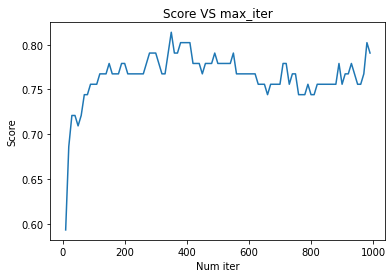

In [ ]:
sns.lineplot(x=iter_range,
             y=accuracyLR).set_title('Score VS max_iter')
plt.ylabel('Score')
plt.xlabel('Num iter')
plt.show()

### Here we see the 350 max_iter with the better score : 0.81395

In [ ]:
accuracyLR_scaled = []
iter_range_scaled = range(10 , 100, 10)
for i in iter_range_scaled:
    print(f"For {i} deph")
    accuracyLR_scaled.append(auto_score(LogisticRegression(max_iter=i), X_train_scaled, X_test_scaled))

For 10 deph
score de précision (accuracy) sur l'ensemble d'entraînement : 0.8196078431372549
score de précision (accuracy) sur l'ensemble de test : 0.7790697674418605 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.85245902 0.83783784 0.69565217 0.90909091 0.59259259] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.86666667 0.79487179 0.74418605 0.87301587 0.72727273] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.83870968 0.88571429 0.65306122 0.94827586 0.5       ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      52           0  ...               5                0
good: reel                      0          62  ...               0                2
not good not bad: reel          5           8  ...               3                1
very bad: reel                  3  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               3                0
good: reel                      0          62  ...               0                3
not good not bad: reel          6           7  ...               2                1
very bad: reel                  2           0  ...              56                0
very good: reel                 0           7  ...               0                9

[5 rows x 5 columns]
Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      15           0  ...               2                0
good: reel                      0          14  ...               0                2
not good not bad: reel          4           2  ...               0                0
very bad: reel                  1           0  ...              23                0
ve

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score de précision (accuracy) sur l'ensemble d'entraînement : 0.8470588235294118
score de précision (accuracy) sur l'ensemble de test : 0.7906976744186046 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.88888889 0.84931507 0.73333333 0.94117647 0.62068966] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.875      0.81578947 0.80487805 0.91803279 0.69230769] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0.90322581 0.88571429 0.67346939 0.96551724 0.5625    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      56           0  ...               3                0
good: reel                      0          62  ...               0                3
not good not bad: reel          6           7  ...               2                1
very bad: reel                  2           0  

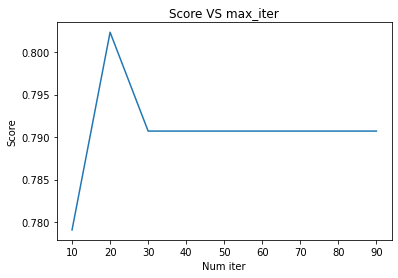

In [ ]:
sns.lineplot(x=iter_range_scaled,
             y=accuracyLR_scaled).set_title('Score VS max_iter')
plt.ylabel('Score')
plt.xlabel('Num iter')
plt.show()

### With scaled value the best is with 20 iter but equal 0.80232

In [ ]:
# Loop for find the best deph
accuracyTree = []
for i in k_range:
    print(f"For {i} deph")
    accuracyTree.append(auto_score(DecisionTreeClassifier(max_depth=i, random_state=120), X_train, X_test))

For 1 deph
score de précision (accuracy) sur l'ensemble d'entraînement : 0.5019607843137255
score de précision (accuracy) sur l'ensemble de test : 0.5232558139534884 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.         0.53435115 0.         0.95867769 0.        ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.         0.36458333 0.         0.92063492 0.        ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0. 1. 0. 1. 0.] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                       0          62  ...               0                0
good: reel                      0          70  ...               0                0
not good not bad: reel          0          44  ...               5                0
very bad: reel                  0           0  ...              58          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For 5 deph
score de précision (accuracy) sur l'ensemble d'entraînement : 0.9019607843137255
score de précision (accuracy) sur l'ensemble de test : 0.8953488372093024 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [1.         0.8427673  0.72727273 1.         0.88235294] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [1.         0.75280899 1.         1.         0.83333333] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [1.         0.95714286 0.57142857 1.         0.9375    ] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      62           0  ...               0                0
good: reel                      0          67  ...               0                3
not good not bad: reel          0          21  ...               0                0
very bad: reel                  0   

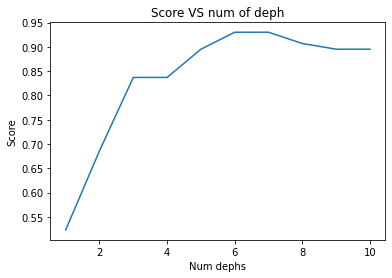

In [ ]:
sns.lineplot(x=k_range,
             y=accuracyTree).set_title("Score VS num of deph")
plt.ylabel('Score')
plt.xlabel('Num dephs')
plt.show()

### We see with 6 dephs we got the best score 0.93023

In [ ]:
accuracyTree_scaled = []
for i in k_range:
    print(f"For {i} deph")
    accuracyTree_scaled.append(auto_score(DecisionTreeClassifier(max_depth=i, random_state=120), X_train_scaled, X_test_scaled))

For 1 deph
score de précision (accuracy) sur l'ensemble d'entraînement : 0.5019607843137255
score de précision (accuracy) sur l'ensemble de test : 0.5232558139534884 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0.         0.53435115 0.         0.95867769 0.        ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0.         0.36458333 0.         0.92063492 0.        ] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0. 1. 0. 1. 0.] 

Confusion matrix train: 
                         bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                       0          62  ...               0                0
good: reel                      0          70  ...               0                0
not good not bad: reel          0          44  ...               5                0
very bad: reel                  0           0  ...              58          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        bad: pred  good: pred  ...  very bad: pred  very good: pred
bad: reel                      17           0  ...               0                0
good: reel                      0          18  ...               0                3
not good not bad: reel          0           6  ...               0                0
very bad: reel                  0           0  ...              24                0
very good: reel                 0           0  ...               0                5

[5 rows x 5 columns]
For 6 deph
score de précision (accuracy) sur l'ensemble d'entraînement : 0.9450980392156862
score de précision (accuracy) sur l'ensemble de test : 0.9302325581395349 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [1.         0.90410959 0.87912088 1.         0.90909091] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [1.         0.86842105 0.95238095 1.         0.88235294] 

Labels    	['bad',

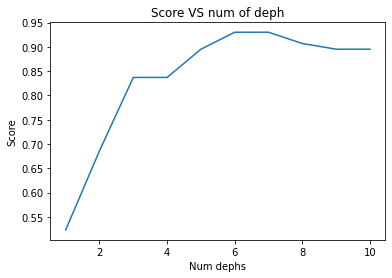

In [ ]:
sns.lineplot(x=k_range,
             y=accuracyTree_scaled).set_title("Score VS num of deph")
plt.ylabel('Score')
plt.xlabel('Num dephs')
plt.show()

## I decide to use the Decission Tree with 6 dephs and scaled value 'cause the score is 0.930232

In [ ]:
# Catch only rows with nan
df_2018_na = df_2018[df_2018['OPINION'].isna()]

In [ ]:
df_2018_na

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,NaN,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,NaN,NaN
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,NaN,NaN
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,NaN,NaN,NaN,NaN,NaN
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,NaN,NaN,NaN,NaN,NaN
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,NaN,NaN,NaN,NaN,NaN
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,NaN,NaN,NaN,NaN,NaN
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,NaN,NaN,NaN,NaN,NaN
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,NaN,NaN,NaN,NaN,NaN
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2018_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 18 to 349
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    24 non-null     datetime64[ns]
 1   MAX_TEMPERATURE_C       24 non-null     int64         
 2   MIN_TEMPERATURE_C       24 non-null     int64         
 3   WINDSPEED_MAX_KMH       24 non-null     int64         
 4   TEMPERATURE_MORNING_C   24 non-null     int64         
 5   TEMPERATURE_NOON_C      24 non-null     int64         
 6   TEMPERATURE_EVENING_C   24 non-null     int64         
 7   PRECIP_TOTAL_DAY_MM     24 non-null     float64       
 8   HUMIDITY_MAX_PERCENT    24 non-null     int64         
 9   VISIBILITY_AVG_KM       24 non-null     float64       
 10  PRESSURE_MAX_MB         24 non-null     int64         
 11  CLOUDCOVER_AVG_PERCENT  24 non-null     float64       
 12  HEATINDEX_MAX_C         24 non-null     int64     

In [ ]:
# Scaled values in df_2018_na
X_na = df_2018_na[X.columns]


In [ ]:
X_na

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
18,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5
31,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2
66,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6
100,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10
118,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7
143,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19
152,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20
163,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18
165,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16
175,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20


In [ ]:
X_na_scaled = scaler.transform(X_na)

In [ ]:
X_na_scaled

array([[-1.05829749, -0.65830235,  0.37231262, -0.79814042, -0.98636288,
        -1.18109907, -0.20324881,  0.84620845,  0.62882277,  0.17353791,
        -0.20979794, -1.06704483, -1.10044395, -0.96759542],
       [-1.35982359, -1.23782054, -0.29943067, -1.16452351, -1.29068537,
        -1.47826755, -0.42248927,  0.26413443,  0.72935556, -0.82934407,
        -0.12301317, -1.34328486, -1.67234587, -1.35092556],
       [-0.60600834, -0.46512963,  0.37231262, -0.61494888, -0.6820404 ,
        -0.73534633, -0.33479308,  0.76305502,  0.52828998, -1.7068658 ,
         0.33260691, -0.65268478, -0.90980998, -0.83981871],
       [-0.30448224, -0.46512963, -0.63530231, -0.61494888, -0.22555667,
        -0.2895936 ,  0.01599166,  0.76305502, -0.97970193, -2.08294654,
         0.55824732, -0.37644475, -0.33790806, -0.32871186],
       [-1.05829749, -0.46512963,  0.37231262, -0.43175733, -0.98636288,
        -0.88393058, -0.20324881,  1.26197561, -0.07490679, -1.33078506,
         1.45646975, -1.06

In [ ]:
# Initialisation model
modelDTC_final = DecisionTreeClassifier(max_depth=6, random_state=120)

In [ ]:
# Training
modelDTC_final.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6, random_state=120)

In [ ]:
predict_opinion = modelDTC_final.predict(X_na_scaled)

In [ ]:
df_2018_na.loc[:,'OPINION'] = predict_opinion

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_2018_na

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,NaN,bad
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,NaN,very bad
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,NaN,not good not bad
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,NaN,NaN,NaN,NaN,not good not bad
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,NaN,NaN,NaN,NaN,bad
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,NaN,NaN,NaN,NaN,good
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,NaN,NaN,NaN,NaN,good
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,NaN,NaN,NaN,NaN,not good not bad
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,NaN,NaN,NaN,NaN,not good not bad
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,NaN,NaN,NaN,NaN,good


In [ ]:
df_2018[df_2018['OPINION'].isna()] = df_2018_na

In [ ]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

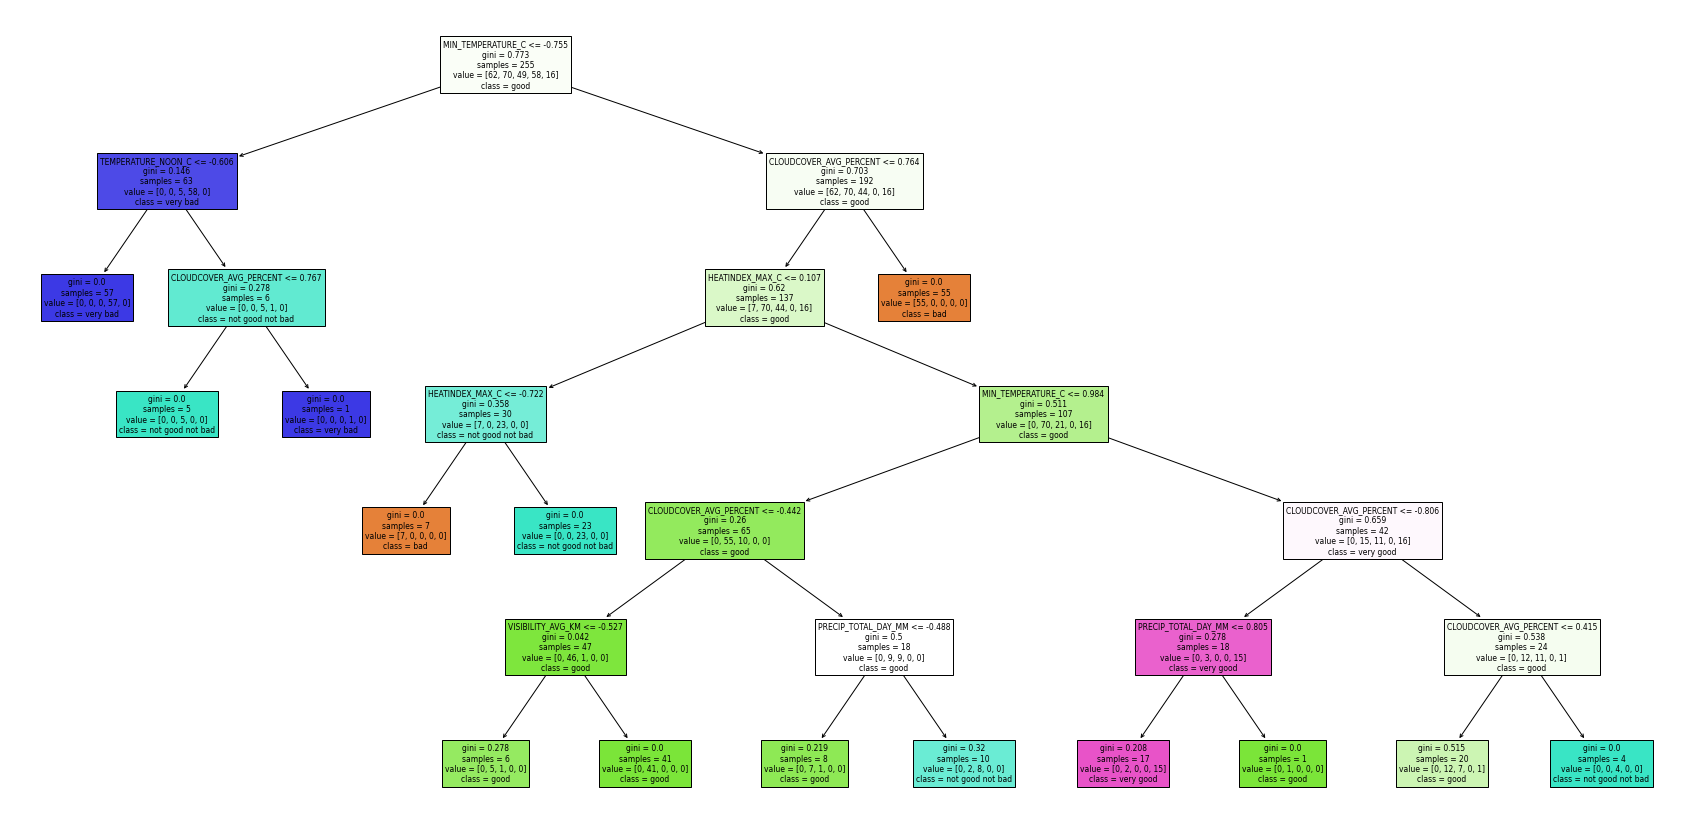

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (30,15))

plot_tree(modelDTC_final, filled = True,
          class_names = modelDTC_final.classes_,
          feature_names=X_train.columns )

plt.show()

## L'arbre a créé des groupes en fonction des variables.
## Puis, il a déterminé un seuil et vérifie si la valeur est sup ou inf à ce seuil pour enchaîner sur une autre variables et ainsi de suite.
## Le model va jusqu'au 6ème niveau pour déterminer l'opinion.
## Nous pouvons constater, que pour déterminer **Bad** il n'est pas allé plus loin que le niveau 5